In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
df = pd.read_csv("J:\Machine_Learning\K_Means_Clustering_unsupervise_learning\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
df = df.drop('Name',axis='columns')
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


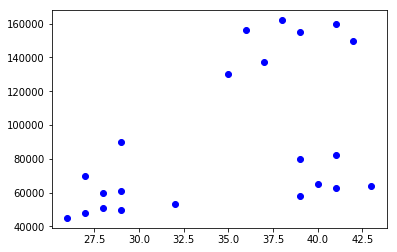

In [8]:
plt.scatter(df.Age,df['Income($)'],color='blue')

In [9]:
km = KMeans(n_clusters=3)                  # we are ourself defining that the cluster is 3 there

In [10]:
y_predict = km.fit_predict(df)             # it will makr each point in the three cluster

In [11]:
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [22]:
df['cluster'] = y_predict
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


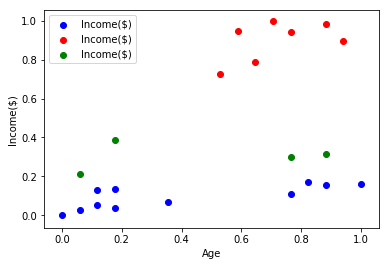

In [23]:
df1 = df[df.cluster==0]                             # we create 3 dataframe for 0th cluster, 1st cluster and 2nd cluster
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()                                        # responisble for upper left corner box defining colour or marker




                         # But when we draw the graph we find the cluster is not perfect as Green dot's are very much appart
                         # this is because of the scale in x and y axis, To solve it we must bring them in same scale for that
                         # we use "MinMaxScaller"


In [24]:
scaler = MinMaxScaler()                               # To bring the scale of x and y axis at same range 

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [28]:
df= df.drop('cluster',axis='columns')   # After changing the scale we againg run kMean clustering
km = KMeans(n_clusters=3)
cluster = km.fit_predict(df)
cluster

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [29]:
df['cluster'] = cluster
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [32]:
km.cluster_centers_                          # This will give the x and y axis of all the centroid

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

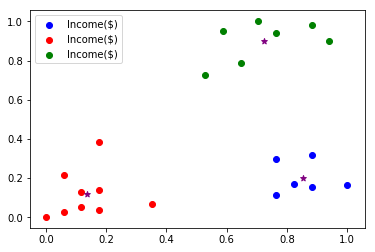

In [37]:
df1 = df[cluster==0]
df2 = df[cluster==1]
df3 = df[cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='blue')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel = 'Age'
plt.ylabel = 'Income($)'

plt.legend()

                # Again draw the graph and this time every thing is fine

In [40]:
                     # But in above we define cluster our own without thinking that the algo might work better with some more
                     # or some less cluster.
              
                     # For that we have a Algo called 'Elbo' which give us a better choice of cluster By finding SSE 
                     # (Sum of Square Error)




sse =[]                            # this is a way of finding Sum of Square Error
k_range = range(1,11)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)        # 'inertia' give us the SSE for each 'K'
    

In [41]:
sse                               # these are the different SSE

[18.388556966533635,
 5.945614491472594,
 0.47507834985530945,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009392,
 0.1729962193245546,
 0.13937852495507835,
 0.10497488680620906,
 0.08581042832107517]

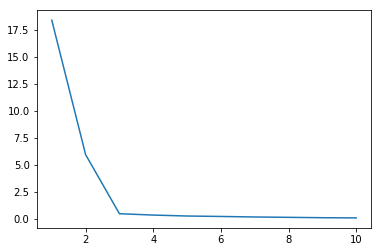

In [45]:
                             # Now we plot the 'SSE' with respet to 'K' to find the 'Elbo'.


plt.xlabel = 'K'
plt.ylabel = 'sse'
plt.plot(k_range,sse)


                            # And we find at 3 we feel like Elbo.